In [ ]:
import pandas as pd
df = pd.read_csv('simple_activity.csv')
df

,person,steps,dist_value,dist_unit,cal_value,cal_unit,fromdate,todate
0,person_0,58,31.0,METER,3.0,KILOCALORIE,2018-06-03T09:20:00,2018-06-03T09:30:00
1,person_1,85,46.0,m,3.0,kcal,2017-04-20T06:33:03,2017-04-20T06:34:04
2,person_2,49,28.0,m,3.0,kcal,2017-01-03T04:30:00,2017-01-03T04:40:00
3,person_3,46,26.0,m,2.0,kcal,2017-09-23T23:35:21,2017-09-23T23:45:21
4,person_4,27,15.0,m,1.0,kcal,2017-07-21T05:25:36,2017-07-21T05:27:10
...,...,...,...,...,...,...,...,...
1436774,person_83,220,118.0,m,10.0,kcal,2017-10-20T08:44:49,2017-10-20T08:54:48
1436775,person_125,10,5.0,METER,0.0,KILOCALORIE,2018-09-13T06:32:02,2018-09-13T06:32:22
1436776,person_414,96,56.0,m,6.0,kcal,2017-02-23T08:46:33,2017-02-23T08:53:07
1436777,person_250,719,414.0,m,46.0,kcal,2017-09-21T02:47:36,2017-09-21T02:57:36


[4260, 3872, 2852, 5410, 6025, 7221, 2242]


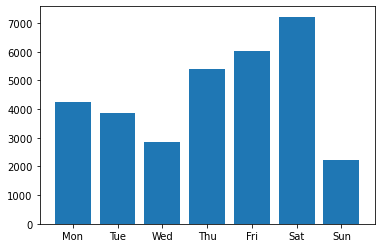

In [ ]:
#사용자의 일주일 걸음 수 시각화
import numpy as np
import csv
from datetime import datetime, date
import matplotlib.pyplot as plt

df = pd.read_csv('simple_activity.csv')

#km를 다 m로 수정
X = df.iloc[:,[0,1,2,3,4,6,7]]
data_list = X.to_numpy()
for i in range(0,1436779):
    if data_list[i][3] == 'KILOMETER' or data_list[i][3] == 'km':
        data_list[i][2]*=1000
        data_list[i][3] = 'm'
        
#person_0 데이터만 가져오기
X_train = []
for i in range(0, 1436779):
    if data_list[i][0] == 'person_0':
        X_train.append(data_list[i])

#각 날짜별 걸음수 저장
date_to_walk = {}

for i in range(0,len(X_train)):
    if X_train[i][5][0:10] in date_to_walk.keys():
        date_to_walk[X_train[i][5][0:10]] += X_train[i][1]
    else:
        date_to_walk[X_train[i][5][0:10]] = X_train[i][1]


#days = ['월', '화', '수', '목', '금', '토', '일']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
period = sorted(date_to_walk)[11:18]

walk = []

for i in range(0,7):
    walk.append(date_to_walk[period[i]])

print(walk)
plt.bar(days, walk)
plt.show()

In [ ]:
#모든 인원의 일주일 걸음 수 데이터 비교해서 랭킹 매김
import pandas as pd
import numpy as np
import csv
from datetime import datetime, date
import matplotlib.pyplot as plt

#df = pd.read_csv('simple_activity.csv')

#km를 다 m로 수정
X = df.iloc[:,[0,1,2,3,4,6,7]]
data_list = X.to_numpy()
for i in range(0,1436779):
    if data_list[i][3] == 'KILOMETER' or data_list[i][3] == 'km':
        data_list[i][2]*=1000
        data_list[i][3] = 'm'
        

#walkdate에 해당하는 날짜의 걸음수를 다 더해서 비교
person_to_walk = {}
walkdate = ['2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06']
#walkdate = ['2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12', '2018-05-13']
#walkdate = ['2017-05-07', '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-13']
for i in range(0, 1436779):
    if data_list[i][0] in person_to_walk.keys():
        if data_list[i][5][0:10] in walkdate:
            person_to_walk[data_list[i][0]] += data_list[i][1]
    else:
        if data_list[i][5][0:10] in walkdate:
            person_to_walk[data_list[i][0]] = data_list[i][1]

#걸음 수 데이터 추출 후 내림차순 정렬
steps = list(person_to_walk.values())
steps_sorted = sorted(steps, reverse=True)

#내림차순 정렬한 순서대로 (이름, 걸음수) tuple의 형태로 ranking에 저장
ranking = sorted(person_to_walk.items(), key = lambda x:x[1], reverse=True)
ranking_person = []

#등수대로 이름만을 가져와서 ranking_person에 출력
for i in range(0,len(steps)):
    ranking_person.append(ranking[i][0])

all_rank = []
ind = []
for i in range(0, len(ranking_person)):
    ind.append(str(i+1)+'위')
    all_rank.append([ranking_person[i],person_to_walk[ranking_person[i]]])

pd.DataFrame(all_rank, columns=['name', 'step_count'], index=ind)

,name,step_count
1위,person_144,470170
2위,person_518,108169
3위,person_22,98670
4위,person_155,75919
5위,person_55,56687
6위,person_298,54432
7위,person_208,53656
8위,person_213,51690
9위,person_560,51348
10위,person_135,51234


In [ ]:
#사용자 이름
user_name = 'person_0'

#사용자가 이번주에 걸은 일주일 걸음수
person_0_walk = person_to_walk[user_name]

#사용자의 주별 걸음 수 상위 몇 %인지 계산
tier = (steps_sorted.index(person_0_walk)+1)/len(steps)*100

print('{}의 이번주 걸음 수 순위는 {}위로 전체 {}명 중에서 상위 {}%입니다.'.format(user_name, steps_sorted.index(person_0_walk)+1, len(steps), tier))

if tier < 4.0:
      print('따라서 {}의 이번주 걸음 등급은 {}입니다.'.format(user_name, 'Diamond'))
elif tier < 11.0:
      print('따라서 {}의 이번주 걸음 등급은 {}입니다.'.format(user_name, 'Platinum'))
elif tier < 23.0:
      print('따라서 {}의 이번주 걸음 등급은 {}입니다.'.format(user_name, 'Gold'))
elif tier < 40.0:
      print('따라서 {}의 이번주 걸음 등급은 {}입니다.'.format(user_name, 'Silver'))
elif tier < 60.0:
      print('따라서 {}의 이번주 걸음 등급은 {}입니다.'.format(user_name, 'Bronze'))
else:
      print('따라서 {}의 이번주 걸음 등급은 {}입니다.'.format(user_name, 'Unranked'))

person_0의 이번주 걸음 수 순위는 19위로 전체 50명 중에서 상위 38.0%입니다.
따라서 person_0의 이번주 걸음 등급은 Silver입니다.
